<a href="https://colab.research.google.com/github/kipsangchepesa/Analysis-IP-week2/blob/main/Moringa_Data_Science_core_W2_Independent_Project_2021_10_Kipsang_Mutai_IP_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the needed libraries.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading our dataset from the link http://bit.ly/FinancialDataset

df=pd.read_csv('http://bit.ly/FinancialDataset')

In [3]:

# Checking the number of records in the dataset.
print('The dataset has ' +str(df.shape[0])+ ' Rows and ' +str(df.shape[1])+ ' Columns')

The dataset has 23524 Rows and 13 Columns


In [4]:
# Previewing the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Preview from the bottom
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
#checking the data types in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

# Find and deal with outliers, anomalies, and missing data within the dataset.

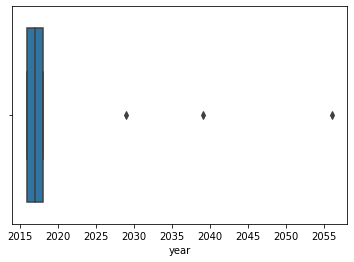

In [7]:

# checking for outliers
sns.boxplot(x=df['year'])

In [8]:
#Checking for missing data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [9]:
# Dealing with null values by dropping them

df1= df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
df1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [10]:
# Checking the new record size
print('The dataset now has ' +str(df1.shape[0])+ ' Rows and ' +str(df1.shape[1])+ ' Columns')

The dataset now has 23343 Rows and 13 Columns


In [11]:
# Cleaning the column headers space
df1.columns = df1.columns.str.replace(' ','_')
df1.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Perform univariate, bivariate and multivariate analysis recording your observations

In [12]:
# checking the frequency 
print('Marital status frequency')
print(df1.marital_status.value_counts())
print('gender of respondent frequency')
print(df1.gender_of_respondent.value_counts())
print('level of education frequency')
print(df1.Level_of_Educuation.value_counts())

Marital status frequency
Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64
gender of respondent frequency
Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64
level of education frequency
Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level_of_Educuation, dtype: int64


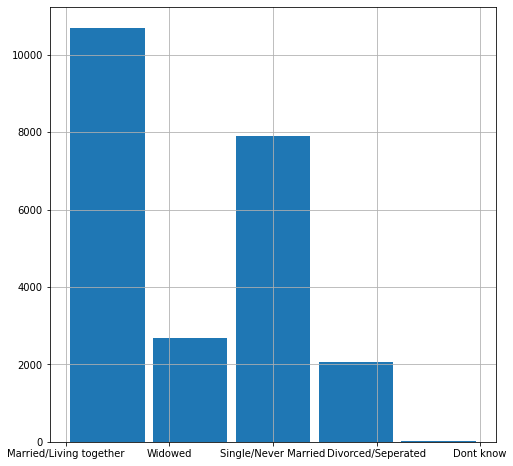

In [13]:
# Marital status
df1['marital_status'].hist(bins=5, rwidth=0.9, figsize=(8,8))

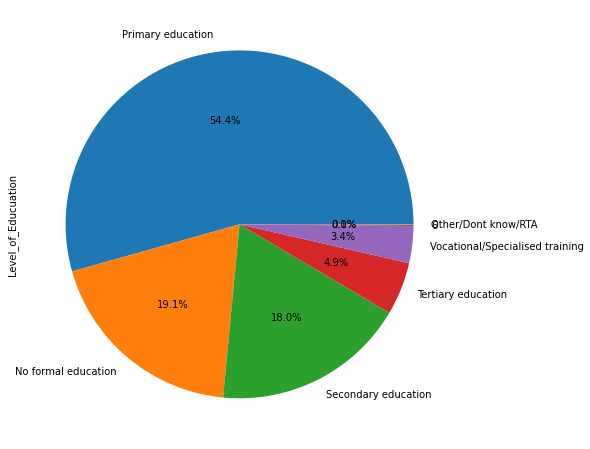

In [14]:

# checking the size of the population in each level of education
#plt.hist(df1['Level_of_Educuation'], bins= 10, histtype='bar', rwidth=9.9)
plt.figure(figsize=(10,8))
df1['Level_of_Educuation'].value_counts().plot(kind= 'pie', autopct='%.1f%%')

In [15]:
df1.describe()

,year,household_size,Respondent_Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis

In [17]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 330 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=ddcfb1aea4c8da6c03d9b4b82174b0fc261a5ee6db6f8ab09b94573dc6ed51ae
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [20]:
#principal component analysis
x= df1.drop('marital_status', 1)
y= df1['marital_status']

In [21]:
#splitting the dataset  to get training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)